<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Trabajo Practico</h3>
    <h5>Grupo 4</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Braian Drago <p>
        <p>Integrantes: Garnica Hernán - Scime Silvia
</div>

Importamos modulos a utilizar

In [337]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

#!pip install statsmodels


####  Leemos los datos a trabajar


In [338]:
url= 'https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/Consumo_TP.csv'
raw_csv_data = pd.read_csv(url, sep=',', decimal='.')
df_consumo=raw_csv_data.copy()

#### Breve resumen del dataset


In [339]:
print(df_consumo.columns)

df_consumo.Consumo.mean()

Index(['Fecha', 'Consumo'], dtype='object')


45.95726011089604

In [340]:
df_consumo.head(10)

,Fecha,Consumo
0,2023-06-05,46.488384
1,2023-05-23,46.161079
2,2023-05-22,45.449817
3,2023-05-20,43.725000
4,2023-05-19,44.884902
5,2023-05-18,46.485462
6,2023-05-17,46.089042
7,2023-05-16,45.802815
8,2023-05-15,45.871810
9,2023-05-13,44.398464


In [341]:
df_consumo.Fecha.describe()

count            757
unique           757
top       2023-06-05
freq               1
Name: Fecha, dtype: object

In [342]:
df_consumo.dtypes

Fecha       object
Consumo    float64
dtype: object

Adaptamos el dataset para trabajarlo segun sus series temporales

In [343]:
df_consumo.Fecha = pd.to_datetime(df_consumo.Fecha, dayfirst = True)

In [344]:
df_consumo.head()

,Fecha,Consumo
0,2023-06-05,46.488384
1,2023-05-23,46.161079
2,2023-05-22,45.449817
3,2023-05-20,43.725000
4,2023-05-19,44.884902


In [345]:
df_consumo.Fecha.describe()

count                     757
unique                    757
top       2023-06-05 00:00:00
freq                        1
first     2021-10-01 00:00:00
last      2023-10-31 00:00:00
Name: Fecha, dtype: object

In [346]:
df_consumo.dtypes

Fecha      datetime64[ns]
Consumo           float64
dtype: object

In [347]:
from skimpy import skim

In [348]:
skim(df_consumo)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 757    │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Consumo            │    0 │       0 │      46 │    3.8 │    0 │    44 │    46 │    48 │      56 │      ▇▇  │  │
│ └────────────────────┴──────┴─────────┴─────────┴────────┴──────┴───────┴───────┴───────┴─────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Fecha                  │      0 │         0 │     2021-10-01      │     2023-10-31      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Se puede observar que hay al menos 1 día con consumo igual a 0. Se analizará esto.

In [349]:
df_consumo.iloc[df_consumo.Consumo.argmin()]

Fecha      2022-05-17 00:00:00
Consumo                    0.0
Name: 756, dtype: object

El día 2022-05-17 hubo paro de transporte y no hubo carga de combustible, es por este motivo qe retirar del dataset ya que no representa un valor real de consumo.

In [350]:
df_consumo = df_consumo.loc[df_consumo.Consumo>0]

Seteamos como index del dataset segun el dia

In [351]:
df_consumo.set_index("Fecha")

,Consumo
Fecha,
2023-06-05,46.488384
2023-05-23,46.161079
2023-05-22,45.449817
2023-05-20,43.725000
2023-05-19,44.884902
...,...
2022-08-14,42.019789
2022-07-24,39.265885
2023-01-22,46.220412


In [352]:
df_consumo.head()

,Fecha,Consumo
0,2023-06-05,46.488384
1,2023-05-23,46.161079
2,2023-05-22,45.449817
3,2023-05-20,43.725000
4,2023-05-19,44.884902


In [353]:
df_consumo.set_index("Fecha", inplace=True)
df_consumo.head()

,Consumo
Fecha,
2023-06-05,46.488384
2023-05-23,46.161079
2023-05-22,45.449817
2023-05-20,43.725000
2023-05-19,44.884902


#### Adaptamos el datset segun la frecuencia de la serie temporal dada, donde:

- h: por hora
- w: semanal
- d: diario
- m: mensual
- b: dias laborables



In [354]:
df_consumo=df_consumo.asfreq('d')
df_consumo

,Consumo
Fecha,
2021-10-01,45.201497
2021-10-02,39.899719
2021-10-03,39.705724
2021-10-04,45.777167
2021-10-05,46.147136
...,...
2023-10-27,46.582215
2023-10-28,46.426496
2023-10-29,45.175833


In [355]:
df_consumo=df_consumo.asfreq('d')
df_consumo.head()

,Consumo
Fecha,
2021-10-01,45.201497
2021-10-02,39.899719
2021-10-03,39.705724
2021-10-04,45.777167
2021-10-05,46.147136


In [356]:
df_consumo.isna()

,Consumo
Fecha,
2021-10-01,False
2021-10-02,False
2021-10-03,False
2021-10-04,False
2021-10-05,False
...,...
2023-10-27,False
2023-10-28,False
2023-10-29,False


In [357]:
df_consumo.isna().sum()

Consumo    5
dtype: int64

Visualizamos una vez mas el dataset, pero esta vez teniendo en cuenta la serie temporal

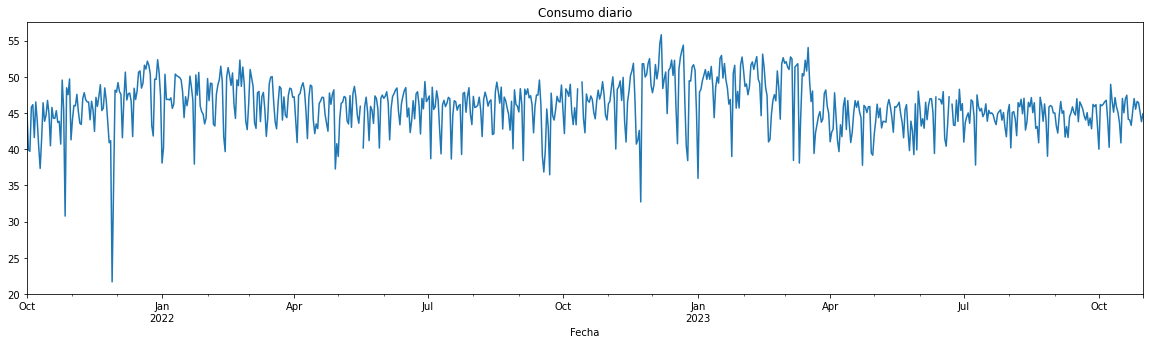

In [358]:
df_consumo.Consumo.plot(figsize=(20,5), title = "Consumo diario")
plt.show()

<AxesSubplot:ylabel='Consumo'>

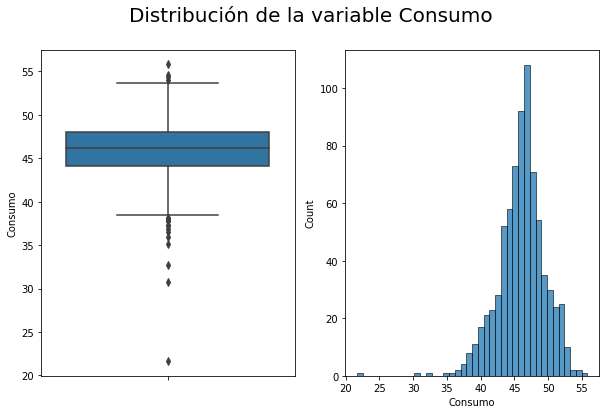

In [359]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de la variable Consumo', fontsize = 20)


sns.histplot(data = df_consumo, x="Consumo", ax = axs[1])
sns.boxplot(y = "Consumo", data = df_consumo, ax = axs[0])


La variable consumo tiene una asimetría a la izquierda, habiendo días en donde el consumo fue muy bajo.

Descomposición de Series Temporales

In [360]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

Descomposicion Aditiva

In [361]:
df_consumo=df_consumo.dropna()

In [362]:
df_consumo.isna().sum()

Consumo    0
dtype: int64

In [363]:
df_consumo = df_consumo.asfreq('d')
df_consumo = df_consumo.fillna(1)

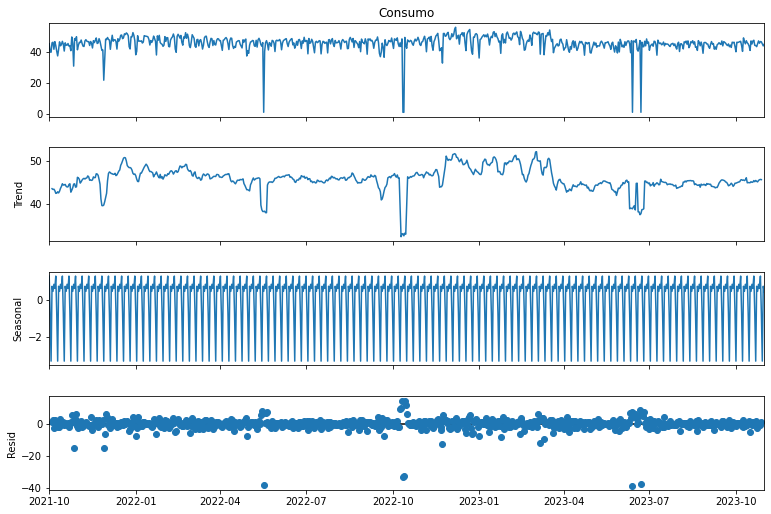

In [364]:
s_dec_additive = seasonal_decompose(df_consumo.Consumo, model = "adittive")
fig = s_dec_additive.plot()
fig.set_size_inches(12,8)
plt.show()

Se visualiza la tendencia de la serie.

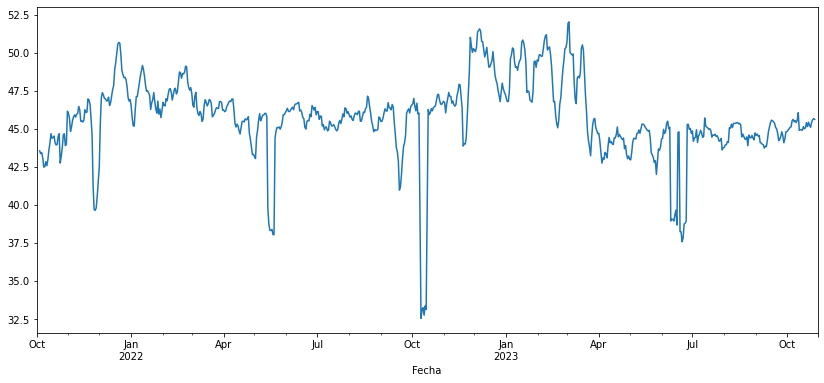

In [365]:
plt.figure( figsize = (14,6))
s:s_dec_additive.trend.plot()
plt.show()

La serie presenta estacionalidad, se verá a continuación.

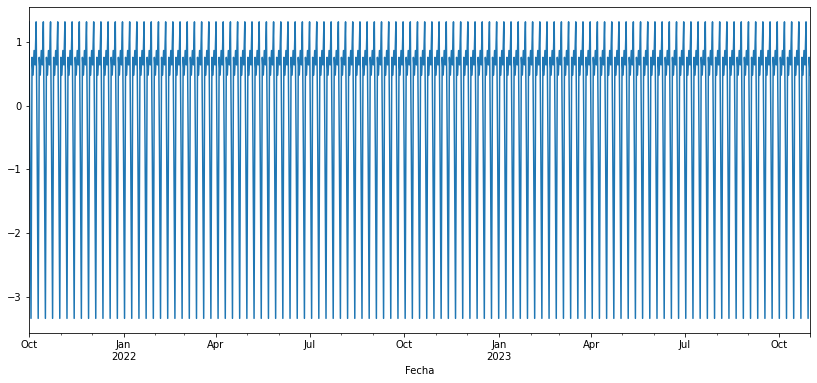

In [366]:
plt.figure( figsize = (14,6))
s_dec_additive.seasonal.plot()
plt.show()


Se visualizan los residuos.

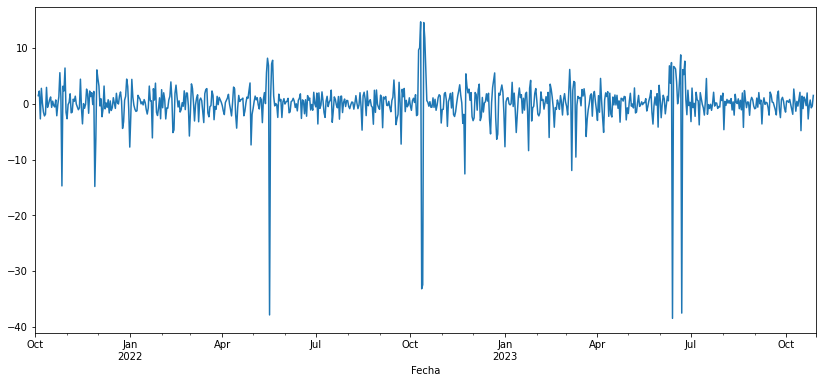

In [367]:
plt.figure( figsize = (14,6))
s_dec_additive.resid.plot()
plt.show()


*COMENTARIO NUEVO 2*

Al hacer la descomposicion de la serie se pueden observar 4 caracteristicas =
- El ciclo
- La tendecia   
- La estacionalidad  ---> la serie no presenta esta caracteristica. Por ello, se ve asi la grafica.
- Movimientoes irregulares ( el error )

Para mayor informacion, tanto la tendencia como la estacionalidad son componentes de NO estacionariedad. ( dicho termino, se analizara en detalle en las proximos clases )

Descomposicion Multiplicativa

In [368]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0]

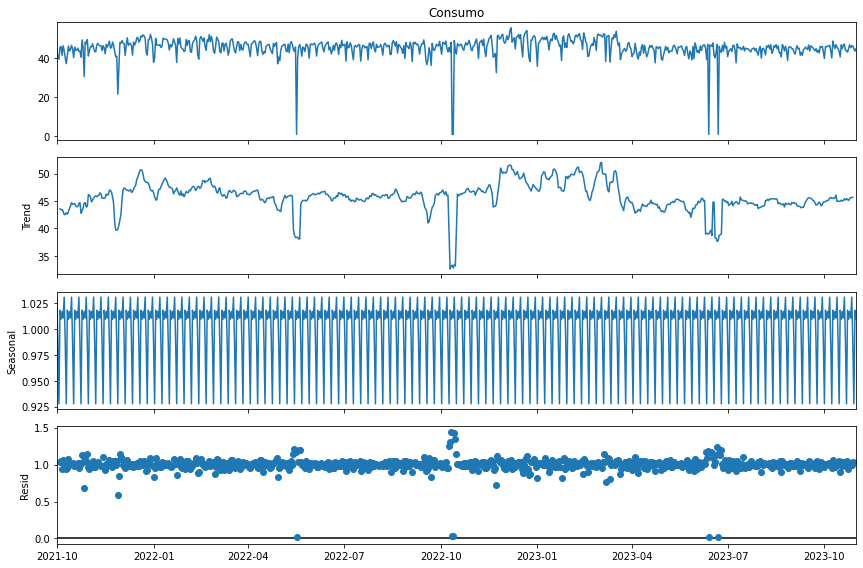

In [369]:
s_dec_multiplicative = seasonal_decompose(df_consumo.Consumo, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

A continuación se visualiza la tendencia

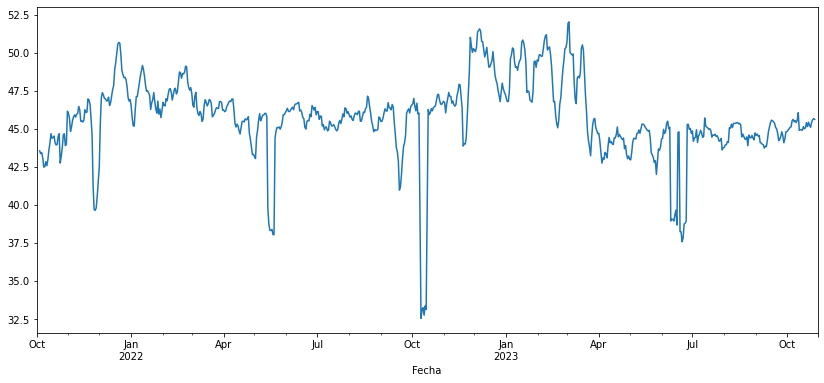

In [370]:
plt.figure( figsize = (14,6))
s_dec_multiplicative.trend.plot()
plt.show()

Se visualiza a continuación la estacionalidad.

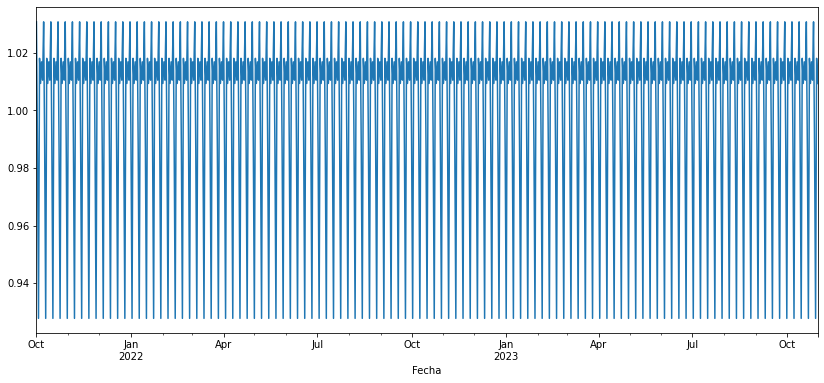

In [371]:
plt.figure( figsize = (14,6))
s_dec_multiplicative.seasonal.plot()
plt.show()

Se visualizan los residuos del modelos.

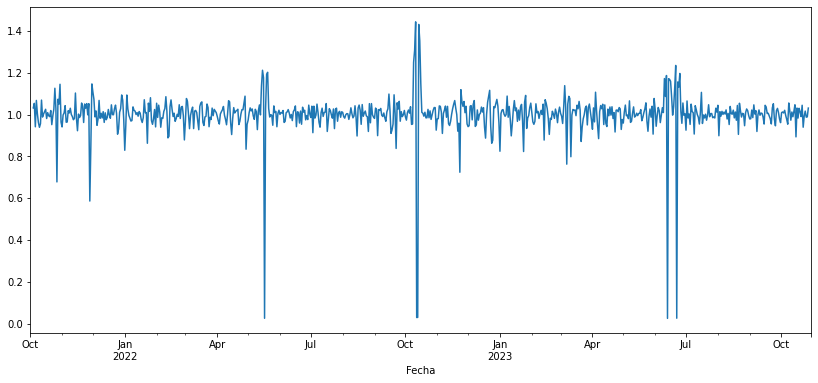

In [372]:
plt.figure( figsize = (14,6))
s_dec_multiplicative.resid.plot()
plt.show()

Representación gráfica de la Función de Autocorrelación

In [373]:
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [374]:
matplotlib.rcParams['figure.figsize']=[6.0,4.0]

Grafico ACF del indice Standard & Poor's 500 (SPX)

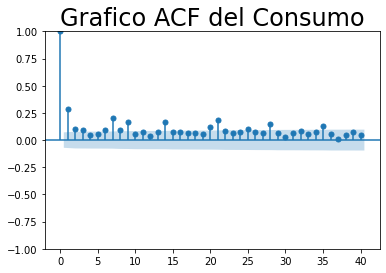

In [375]:
plot_acf(df_consumo.Consumo,lags=40)
plt.title("Grafico ACF del Consumo", size= 24)
plt.show()

*COMENTARIO NUEVO 3*

El grafico es el llamado de autocorrelacion. En el mismo, nos da una primera aproximacion de estacionariedad o no estacionariedad (recuerden que es una primera aproximacion, no definitiva, que luego se testea para confirmar ) .

En este caso, la grafica presenta signos de no estacionarieda. Ya que tiene un decrecimiento lineal que no llega a bajar en el tiempo.

APLICAMOS UNA TRANSFORMACION DE LA SERIE

In [376]:
primera_diffs=df_consumo.Consumo.values[1:]-df_consumo.Consumo.values[:-1]
primera_diffs=np.concatenate([primera_diffs,[0]])

In [377]:
df_consumo['primera_diffs_Consumo']=primera_diffs

In [378]:
df_consumo.head()

,Consumo,primera_diffs_Consumo
Fecha,,
2021-10-01,45.201497,-5.301778
2021-10-02,39.899719,-0.193995
2021-10-03,39.705724,6.071443
2021-10-04,45.777167,0.369969
2021-10-05,46.147136,-4.538013


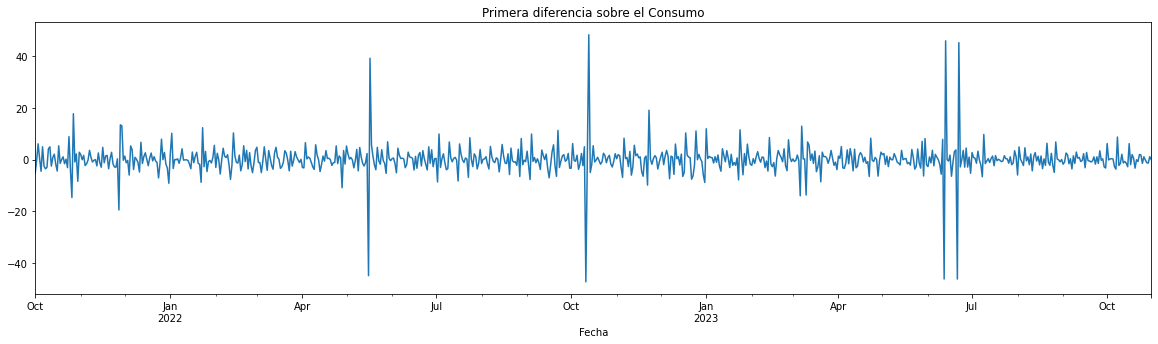

In [379]:
#grafico este indice con las diferencias aplicadas fila a fila
df_consumo.primera_diffs_Consumo.plot(figsize=(20,5), title = "Primera diferencia sobre el Consumo")
plt.show()

*COMENTARIO NUEVO 4*

En este caso, vemos la grafica de la primera diferencia de la serie original. Nos muestra una caracteristia del Ruido blanco ( White noise ).

Caracteristicas generales White noise =

- TIENE REVERSION A LA MEDIA
- VALOR ESPERADO CONSTANTE = 0
- VOLATILIDAD CONSTANTE EN EL TIEMPO



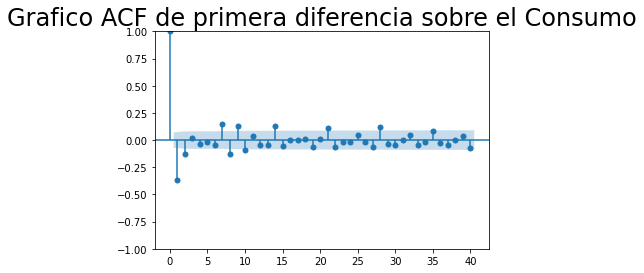

In [380]:
plot_acf(df_consumo.primera_diffs_Consumo,lags=40)
plt.title("Grafico ACF de primera diferencia sobre el Consumo", size= 24)
plt.show()

### Gráfico de Autocovarianza

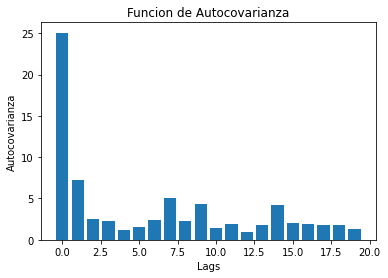

In [381]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = df_consumo.Consumo

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(20)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars)
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza')
plt.show()

In [382]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

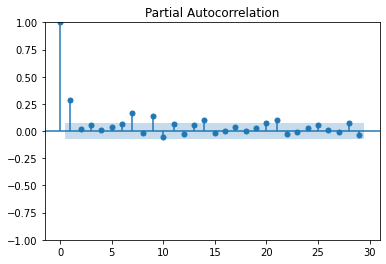

In [383]:
plot_pacf(df_consumo.Consumo);

El consumo se comporta como un random walk, por lo que se modelizará como un AR(1).

In [384]:
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import ADFTest
from matplotlib import pyplot

In [385]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima, ndiffs, nsdiffs
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from datetime import timedelta
import statsmodels.api as sm
from scipy import stats

In [386]:
def estacionario(y):
  # Estimado de número de diferencias con ADF test:Dickey-Fuller
  n_adf = ndiffs(y, test='adf')  # -> 0

  # KPSS test (auto_arima default): Kwiatkowski-Phillips-Schmidt-Shin
  n_kpss = ndiffs(y, test='kpss')  # -> 0

  # PP test: Phillips-Perron
  n_pp = ndiffs(y, test='pp')  # -> 0

  print('Estimado de número de diferencias con ADF test')
  print(n_adf)

  print('Estimado de número de diferencias con KPSS test')
  print(n_kpss)

  print('Estimado de número de diferencias con PP test')
  print(n_pp)

  print('Se debe realizar diferenciación (should_diff) ADF Test')
  adftest = ADFTest(alpha=0.05)
  print(adftest.should_diff(y))

In [387]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2,figsize=(18,10),sharex=True, sharey=False )
  axes[2,0].set_xlabel('Lag')
  axes[2,1].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Serie: Consumo')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')

  plot_acf(serie_nr, lags=nrol, ax= axes[0,1], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Primera Derivada Consumo')
  plot_pacf(serie_nr, lags=nrol, ax= axes[1,1], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,1].plot(tsa.acovf(serie_nr,fft=False, nlag=nrol), color='r', label='AutoCov')

  p1.legend()
  plt.show()

In [388]:
def print_test_afd(y):
  resultado = tsa.adfuller(y)
  print('Estadistico ADF: %f' % resultado[0])
  print('p-valor: %f' % resultado[1])
  print('Valores criticos:')
  for key, valor in resultado[4].items():
    print('\t%s: %.3f' % (key, valor))

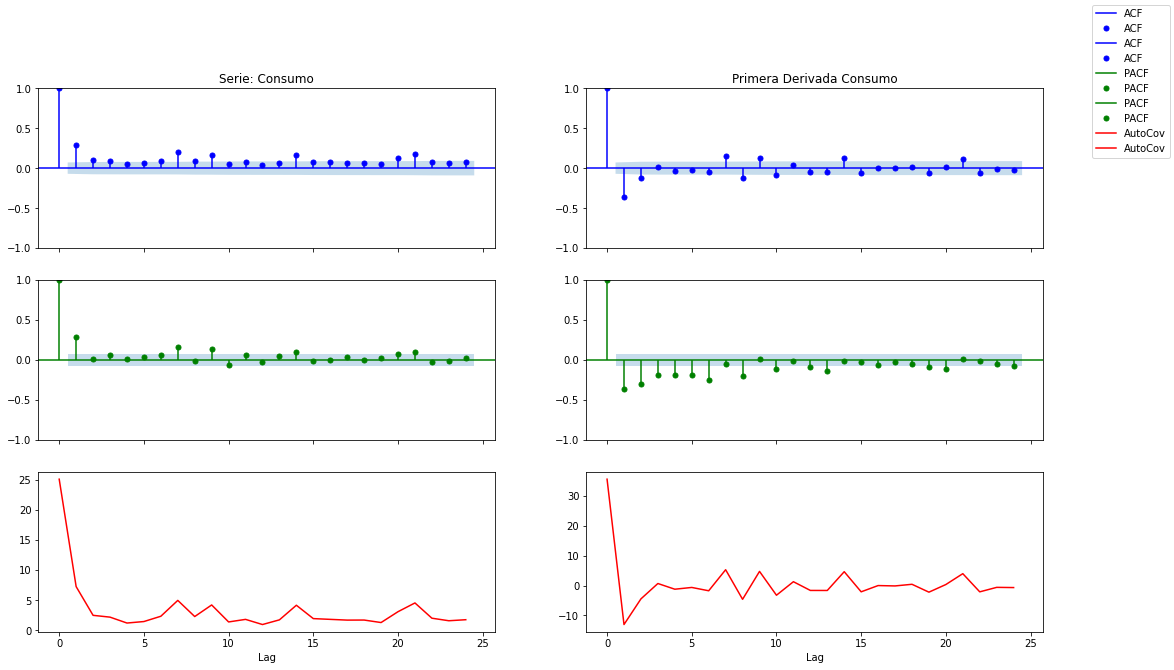

In [389]:
autocov_autocorr(df_consumo.Consumo,df_consumo.primera_diffs_Consumo ,24)

Diferenciación estacional por 12 períodos de la serie

In [390]:
df_consumo_diff_12 = df_consumo.copy()
df_consumo_diff_12 = df_consumo_diff_12 - df_consumo_diff_12.shift(12)
df_consumo_diff_12 = df_consumo_diff_12.dropna()

Transformación Box Cox

In [391]:
df_consumo_BoxCox = df_consumo.copy()
transformacion_Box_Cox = np.asarray(df_consumo_BoxCox['Consumo'].values)

In [392]:
fitted_data, fitted_lambda = stats.boxcox(transformacion_Box_Cox)

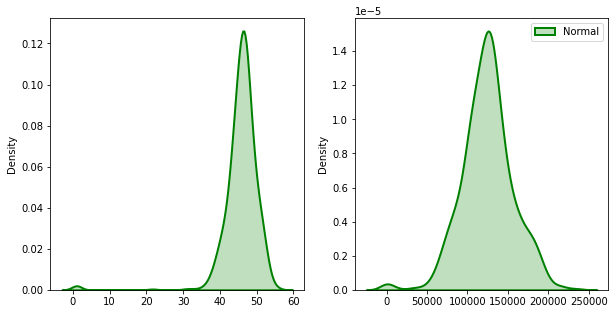

In [393]:
# creando ejes para dibujar
fig, ax = plt.subplots(1, 2)

# grafico de serie original (non-normal) y fitted data (normal)
sns.distplot(transformacion_Box_Cox, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

# agregando leyendas a las subtramas
plt.legend(loc = "upper right")

# reescalando las subtramas
fig.set_figheight(5)
fig.set_figwidth(10)

In [394]:
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 3.3777885069965405


In [395]:
df_consumo_BoxCox=pd.DataFrame(fitted_data, columns=['Consumo'])

Transformación logarítmica

In [396]:
df_consumo_log = df_consumo.copy()
df_consumo_log = np.log(df_consumo_log)

Transformación raiz cuadrada

In [397]:
df_consumo_Rcuadrado = df_consumo.copy()
df_consumo_Rcuadrado = np.sqrt(df_consumo_Rcuadrado)

## Analisis de estacionariedad de la serie

Serie original

In [398]:
print_test_afd(df_consumo.Consumo)

Estadistico ADF: -4.724156
p-valor: 0.000076
Valores criticos:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [399]:
# No incluye término independiente ni lineal (“None”)
tsa.adfuller(df_consumo.Consumo, maxlag=None, regression='n', autolag='AIC', store=False, regresults=False)

(-0.04189494939302701,
 0.6701687076263613,
 20,
 740,
 {'1%': -2.5687679747991234,
  '5%': -1.9413690409181095,
  '10%': -1.6164659746609282},
 4413.663692842476)

In [400]:
# Incluya término independiente pero no incluye término lineal (“Drift”)
tsa.adfuller(df_consumo.Consumo, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-4.724155736850643,
 7.578614044338656e-05,
 13,
 747,
 {'1%': -3.439134355513998,
  '5%': -2.865416893922985,
  '10%': -2.56883447171999},
 4403.128613467281)

In [401]:
# Incluya ambos términos (“Trend”) - se denomina Ecuación de Dickey Fuller Aumentada
tsa.adfuller(df_consumo.Consumo, maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

(-4.846081406140522,
 0.0003886456140057534,
 13,
 747,
 {'1%': -3.9709405443670263,
  '5%': -3.4163836783127746,
  '10%': -3.1305183995416552},
 4403.856398291348)

Salvo en el test donde no se incluye la componente lineal ni término lineal, en todos los otros test el pvalor es menor a 0,05.

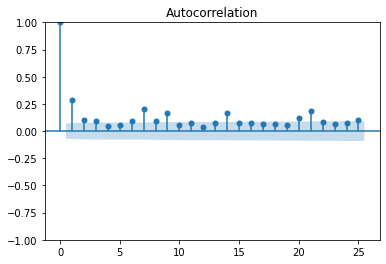

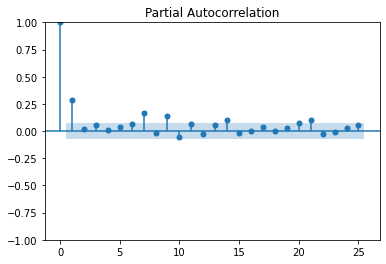

In [402]:
plot_acf(df_consumo.Consumo,lags=25);
plot_pacf(df_consumo.Consumo,lags=25);

In [403]:
estacionario(df_consumo.Consumo)

Estimado de número de diferencias con ADF test
0
Estimado de número de diferencias con KPSS test
1
Estimado de número de diferencias con PP test
0
Se debe realizar diferenciación (should_diff) ADF Test
(0.01, False)


Solo 1 de los 4 test realizados indica que debe diferenciarse la serie.

Phillips-Perron

In [404]:
#!pip install arch
from arch.unitroot import PhillipsPerron

In [405]:
def Phillips_Perron(series, **k):

    params = {'n':'No incluye término independiente ni lineal',
              'c':'Incluya término independiente pero no incluye término lineal',
              'ct':'Incluya ambos términos'
              }
    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')
        pp = PhillipsPerron(series,trend=param, **k)
        print(f'PP Estadistico: {pp.stat}')
        print(f'p-valor: {pp.pvalue}')
        print(f'numero de lags: {pp.lags}')
        print('Valor Critico:')
        for key, value in pp.critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if pp.pvalue > 0.05 else ""}estacionaria')
        print(f"PP Numero de diferenciacion estimada: {ndiffs(series, test='pp')}")

        print("*".center(60, '*'))
        print("")

In [406]:
Phillips_Perron(df_consumo.Consumo)

Tipo de regresión: n - No incluye término independiente ni lineal
PP Estadistico: -0.6953839795185921
p-valor: 0.41455490124446365
numero de lags: 20
Valor Critico:
   1% : -2.568688121537396
   5% : -1.9413591757567612
   10% : -1.6164751672893278
Resultado: La serie es no estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: c - Incluya término independiente pero no incluye término lineal
PP Estadistico: -23.105869569766906
p-valor: 0.0
numero de lags: 20
Valor Critico:
   1% : -3.4389835846902788
   5% : -2.8653504478604757
   10% : -2.5687990737534627
Resultado: La serie es estacionaria
PP Numero de diferenciacion estimada: 0
************************************************************

Tipo de regresión: ct - Incluya ambos términos
PP Estadistico: -23.02048803011812
p-valor: 0.0
numero de lags: 20
Valor Critico:
   1% : -3.9707314967446967
   5% : -3.416282589512866
   10% : -3.1304589516055548
Resulta

Se el test de Phillips Perron, incluyendo ambos términos, la serie es estacionaria y no necesita de diferenciación.

KPSS

In [407]:
from statsmodels.tsa.stattools import kpss

In [408]:
def kpss_test(series, **kw):

    params = {'c':'Los datos son estacionarios alrededor de una constante.',
              'ct': 'Los datos son estacionarios alrededor de una tendencia.'
             }

    for param in params:
        print(f'Tipo de regresión: {param} - {params.get(param)}')

        statistic, p_value, n_lags, critical_values = kpss(series,regression = param, **kw)
        # Format Output
        print(f'KPSS Estadistico: {statistic}')
        print(f'p-valor: {p_value}')
        print(f'numero de lags: {n_lags}')
        print('Valor critico:')
        for key, value in critical_values.items():
            print(f'   {key} : {value}')
        print(f'Resultado: La serie es {"no " if p_value < 0.05 else ""}estacionaria')
        print(f"KPSS Numero estimado de diferencias a aplicar: {ndiffs(series, test='kpss')}")

        print("*".center(60, '*'))
        print("")

In [409]:
kpss_test(df_consumo.Consumo)

Tipo de regresión: c - Los datos son estacionarios alrededor de una constante.
KPSS Estadistico: 0.4062902456459249
p-valor: 0.0744438596353772
numero de lags: 9
Valor critico:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Resultado: La serie es estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************

Tipo de regresión: ct - Los datos son estacionarios alrededor de una tendencia.
KPSS Estadistico: 0.26478520990166504
p-valor: 0.01
numero de lags: 9
Valor critico:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Resultado: La serie es no estacionaria
KPSS Numero estimado de diferencias a aplicar: 1
************************************************************



En el test KPSS indica que se debe aplicar 1 diferenciación y que la serie es estacionaria.

In [410]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Reject the null hypothesis")
    print("Data is stationary")
  else:
    print("Conclusion:====>")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

In [411]:
# Dicky Fuller Serie original
Augmented_Dickey_Fuller_Test_func(df_consumo.Consumo,'Consumo')

Results of Dickey-Fuller Test for column: Consumo
Test Statistic                  -4.724156
p-value                          0.000076
No Lags Used                    13.000000
Number of Observations Used    747.000000
Critical Value (1%)             -3.439134
Critical Value (5%)             -2.865417
Critical Value (10%)            -2.568834
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


## ARIMA

In [412]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [413]:
model = sm.tsa.arima.ARIMA(df_consumo.Consumo, order=((1),0,0))
result = model.fit()

In [414]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Consumo   No. Observations:                  761
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2272.070
Date:                Mon, 27 Nov 2023   AIC                           4550.141
Time:                        22:36:40   BIC                           4564.044
Sample:                    10-01-2021   HQIC                          4555.494
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.7220      0.378    121.022      0.000      44.981      46.462
ar.L1          0.2896      0.013     22.638      0.000       0.265       0.315
sigma2        22.9491      0.371     61.799      0.000      22.221      23.677
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             60810.24
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -4.88
Prob(H) (two-sided):                  0.05   Kurtosis:                        45.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [415]:
result.arroots

array([3.45300603])

In [416]:
print(f"La raiz REAL del modelo condicionado a un AR(1)  es= {result.arroots} \n vemos que es en modulo mayor a 1. Es decir, es estacionaria ")

La raiz REAL del modelo condicionado a un AR(1)  es= [3.45300603] 
 vemos que es en modulo mayor a 1. Es decir, es estacionaria 


In [417]:
print(f"Los parametros que arroja el modelo son= \n {result.params} ")

Los parametros que arroja el modelo son= 
 const     45.721955
ar.L1      0.289603
sigma2    22.949085
dtype: float64 


In [418]:
print(f"Los criterios de informacion que arroja el modelo son \n -Akaike= {result.aic} \n -Bayesiano= {result.bic} \n -Hannan-Quinn {result.hqic}")

Los criterios de informacion que arroja el modelo son 
 -Akaike= 4550.140500251049 
 -Bayesiano= 4564.044400324634 
 -Hannan-Quinn 4555.494320695793


In [419]:
print(f" La media de los residuos del modelo es=  {result.resid.mean()}")

 La media de los residuos del modelo es=  -9.356383538426297e-05


In [420]:
print(f" La varianza de los residuos del modelo es=  {result.resid.var()}")

 La varianza de los residuos del modelo es=  22.979427226077295


La media de los residuos se encuentra muy cercana a 0, aunque los residuos presentan una gran varianza.

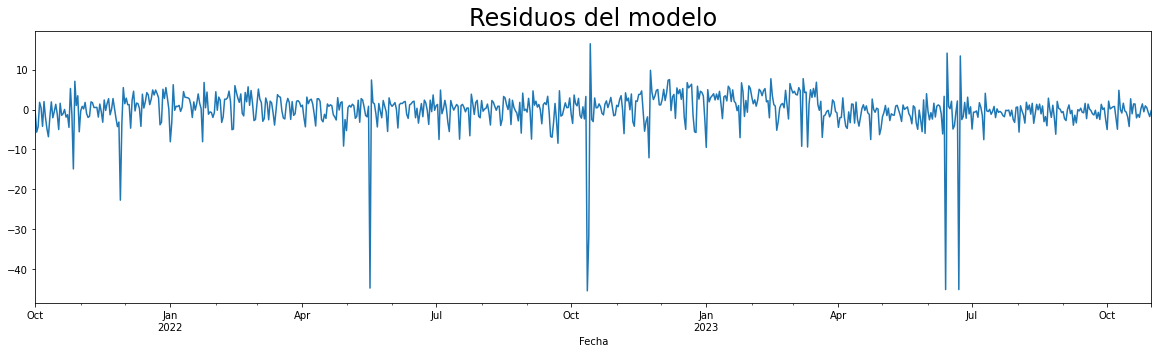

In [421]:
result.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()

Se analiza si los residuos se comportan como ruido blanco.

Text(0.5, 1.0, 'Histograma de los residuos del modelo')

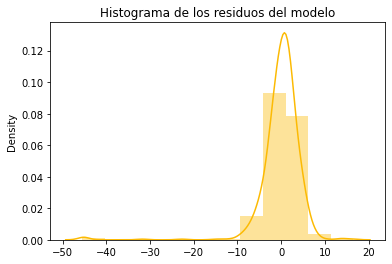

In [422]:
sns.distplot(result.resid,bins=12,color='#fcba03')
plt.title('Histograma de los residuos del modelo')

In [423]:
import scipy.stats
import pylab

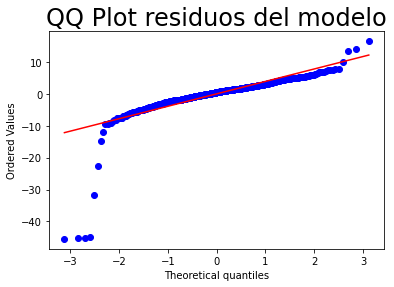

In [424]:
scipy.stats.probplot(result.resid, plot = pylab)
plt.title("QQ Plot residuos del modelo", size = 24)
pylab.show()

En el QQ plot se puede ver la gran asimetría hacia la izquierda que tienen los residuos del modelo. Esto se debe a que en algunos días de la serie no se cargaron combustible y por lo tanto el consumo fue 0. Estos puntos exógenos no pueden ser predichos por el modelo y genera que los residuos sean muy grandes.

### Prueba Ljung-Box

In [425]:
import statsmodels.api as sm

In [426]:
Incorr_residuos_modelo=sm.stats.acorr_ljungbox(result.resid, lags=30)

In [427]:
Incorr_residuos_modelo

,lb_stat,lb_pvalue
1,0.016881,8.966232e-01
2,0.017808,9.911355e-01
3,2.521184,4.714748e-01
4,2.625562,6.223017e-01
5,3.090516,6.860332e-01
6,3.771938,7.075068e-01
7,27.738013,2.452688e-04
8,27.778234,5.183057e-04
9,45.783641,6.605323e-07
10,45.857257,1.522205e-06


Text(0, 0.5, 'P-valores ')

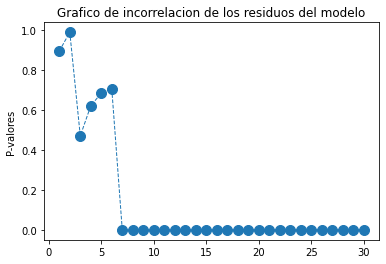

In [428]:
plt.plot(Incorr_residuos_modelo.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo")
plt.ylabel("P-valores ")

Presentan correlación los residuos??

## AutoARIMA

In [429]:
# Separacion Train/Test
# Seleccionamos el primer 80% para train
train = df_consumo.Consumo.iloc[:round(len(df_consumo.Consumo)*.80)]

# Seleccionamos el 20% restante para test
test = df_consumo.Consumo.iloc[round(len(df_consumo.Consumo)*.80):]

# Corroboramos que los limites se hayan establecido segun lo planificado
print(train, test)

Fecha
2021-10-01    45.201497
2021-10-02    39.899719
2021-10-03    39.705724
2021-10-04    45.777167
2021-10-05    46.147136
                ...    
2023-05-28    39.239511
2023-05-29    46.262122
2023-05-30    39.894626
2023-05-31    48.007113
2023-06-01    45.936407
Freq: D, Name: Consumo, Length: 609, dtype: float64 Fecha
2023-06-02    43.199055
2023-06-03    44.204110
2023-06-04    42.891846
2023-06-05    46.488384
2023-06-06    44.061988
                ...    
2023-10-27    46.582215
2023-10-28    46.426496
2023-10-29    45.175833
2023-10-30    43.797751
2023-10-31    44.892422
Freq: D, Name: Consumo, Length: 152, dtype: float64


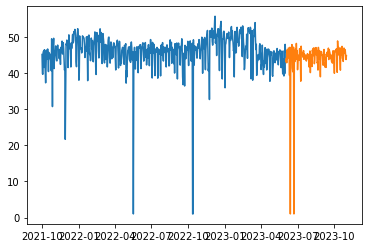

In [430]:
# Visualización Train - Test

plt.plot(train)
plt.plot(test)

In [431]:
# Usamos la funcion auto_arima del paquete pmdarima para optimizar la combinacion de hiperparametros para el modelo SARIMA

auto_arima(train, start_p=0, max_p=5, start_d=1, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=True, m=7, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3653.861, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3532.655, Time=0.72 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3534.175, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6402.698, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=3557.784, Time=0.07 sec


 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=3543.623, Time=2.10 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=3524.179, Time=0.81 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=3537.683, Time=0.15 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=3533.247, Time=1.38 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=3533.970, Time=0.46 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=3619.757, Time=1.00 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=3531.747, Time=1.26 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=3568.493, Time=1.03 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=3528.706, Time=0.88 sec
 ARIMA(2,0,1)(1,0,1)[7] intercept   : AIC=3517.685, Time=1.33 sec
 ARIMA(2,0,1)(0,0,1)[7] intercept   : AIC=3539.115, Time=0.58 sec
 ARIMA(2,0,1)(1,0,0)[7] intercept   : AIC=3535.736, Time=1.18 sec
 ARIMA(2,0,1)(2,0,1)[7] intercept   : AIC=inf, Time=2.22 sec
 ARIMA(2,0,1)(1,0,2)[7] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  609
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 7)   Log Likelihood               -1744.712
Date:                             Mon, 27 Nov 2023   AIC                           3503.423
Time:                                     22:37:33   BIC                           3534.306
Sample:                                 10-01-2021   HQIC                          3515.437
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.6997     12.392      1.106      0.269     -10.587      37.987
ar.L1         -0.8705      1.580     -0.551      0.582      -3.967       2.226
ma.L1          1.2645      1.577      0.802      0.423      -1.826       4.355
ma.L2          0.3403      0.632      0.538      0.590      -0.898       1.579
ar.S.L7        0.8407      0.060     13.970      0.000       0.723       0.959
ma.S.L7       -0.6897      0.074     -9.284      0.000      -0.835      -0.544
sigma2        17.9797      0.313     57.493      0.000      17.367      18.593
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):             56525.17
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                            -4.78
Prob(H) (two-sided):                  0.06   Kurtosis:                        49.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [432]:
modelo_sarima = SARIMAX(train, order=(4,1,0), seasonal_order=(1,0,1,7))
modelo_sarima = modelo_sarima.fit()
print(modelo_sarima.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             Consumo   No. Observations:                  609
Model:             SARIMAX(4, 1, 0)x(1, 0, [1], 7)   Log Likelihood               -1770.072
Date:                             Mon, 27 Nov 2023   AIC                           3554.143
Time:                                     22:37:35   BIC                           3585.014
Sample:                                 10-01-2021   HQIC                          3566.154
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4458      0.014    -31.131      0.000      -0.474      -0.418
ar.L2         -0.4397      

In [433]:
# Función para graficar

def graficar_pred(serie_test, serie_pred, conf_int, titulo="Valores Originales vs Predicciones", xlabel="Año", ylabel="Pasajeros"):
    fig_x = plt.figure(figsize=(12,3), dpi=100)
    axes_x = fig_x.add_axes([0.0, 0.0, 1, 1])

    # Graficamos los datos tests y las predicciones
    serie_test.plot(label="Serie Original de Test")
    serie_pred.plot(label="Predicciones")

    # Pasamos dataframe con los intervalos de confianza a series de Pandas y graficamos
    conf_int.iloc[:,1].plot(label="Intervalo de Confianza Superior")
    conf_int.iloc[:,0].plot(label="Intervalo de Confianza Inferior")

    axes_x.set_xlabel(xlabel)
    axes_x.set_ylabel(ylabel)
    axes_x.set_title(titulo)
    axes_x.legend(loc=0)
    axes_x.grid(True, color='0.6', dashes=(5,2,1,2))

In [434]:
#Función para evaluar los modelos contra el test en MSE, MAE, RMSE, MAPE

def evaluar_metricas(serie_test, serie_pred):
    print(f'MSE: {mean_squared_error(serie_test, serie_pred)}')
    print(f'MAE: {mean_absolute_error(serie_test, serie_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(serie_test, serie_pred))}')
    print(f'MAPE: {round(np.mean(abs((serie_test-serie_pred)/serie_test)),4)}')

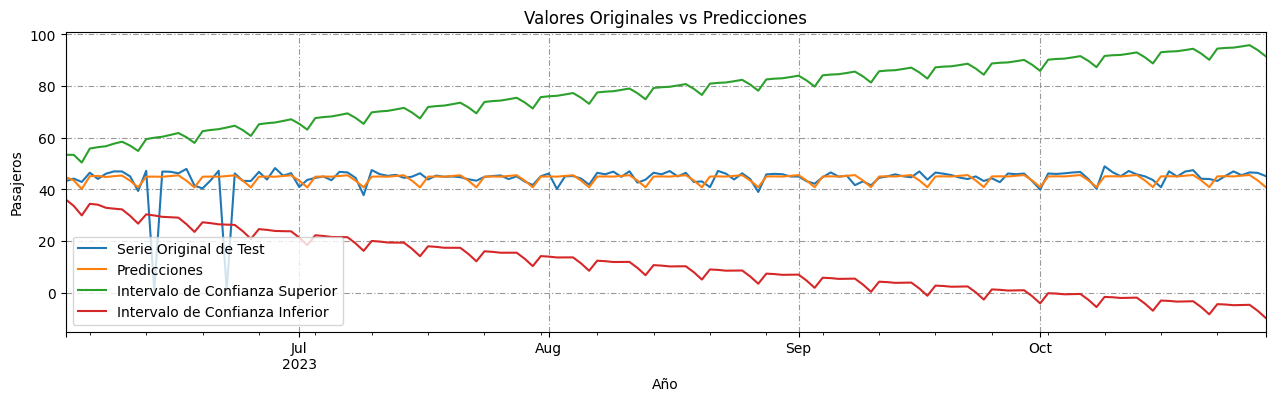

In [435]:
# Utilizando el modelo realizamos la prediccion correspondiente a los primeros 15 días del test
predicciones_sarima = modelo_sarima.get_forecast(150)

# Graficamos la porcion de test de la serie original junto con las predicciones y los intervalos de confianza
graficar_pred(test[:150], predicciones_sarima.predicted_mean, predicciones_sarima.conf_int())

In [436]:
error_relativo_sarima = (test[:150] - predicciones_sarima.predicted_mean) / test[:150]
# Se retiran de los errores de los valores nulos en serie original.
# Estos valores son imposibles de predecir.
#error_relativo_sarima = error_relativo_sarima[error_relativo_sarima >-40]*100

<AxesSubplot:xlabel='Fecha'>

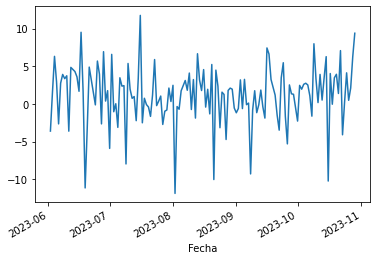

In [437]:
error_relativo_sarima.plot()

In [438]:
print('La media del error relativo es =',round(np.mean(error_relativo_sarima),2),'%')
print('El valor máximo del error relativo es =',round(np.max(error_relativo_sarima),2),'%')
print('El valor mínimo del error relativo es =',round(np.min(error_relativo_sarima),2),'%')

La media del error relativo es = 1.16 %
El valor máximo del error relativo es = 11.77 %
El valor mínimo del error relativo es = -11.89 %


In [439]:
#Evaluamos las métricas del modelo
evaluar_metricas(test[:150], predicciones_sarima.predicted_mean )

MSE: 28.951071877899146
MAE: 1.924334323358083
RMSE: 5.3806200272737295
MAPE: 0.6176


In [440]:
# Pruebo el autoarima sin estacionalidad ( " seasonal = False ")
auto_arima(train, start_p=0, max_p=5, start_d=0, max_d=5, start_q=0, max_q=5,
           start_P=0, max_P=5, start_D=0, max_D=5, start_Q=0, max_Q=5,
           seasonal=False, trace=True, stepwise=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6402.698, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5651.799, Time=0.08 sec


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3615.862, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3785.564, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3550.137, Time=0.33 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5176.168, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3551.934, Time=0.38 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3551.950, Time=0.34 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=4832.449, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3553.755, Time=0.69 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 3.462 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  609
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -1771.068
Date:                Mon, 27 Nov 2023   AIC                           3550.137
Time:                        22:37:39   BIC                           3567.784
Sample:                    10-01-2021   HQIC                          3557.002
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   5014.860      0.000       1.000       1.000
ma.L1         -0.5929      0.014    -43.011      0.000      -0.620      -0.566
ma.L2         -0.3454      0.020    -16.902      0.000      -0.385      -0.305
sigma2        19.4459      0.283     68.786      0.000      18.892      20.000
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             39773.40
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -4.22
Prob(H) (two-sided):                  0.53   Kurtosis:                        41.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [441]:
modelo_arima = sm.tsa.arima.ARIMA(train, order=(5,1,2), seasonal_order=(0, 0, 0, 0))
modelo_arima = modelo_arima.fit()

modelo_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Consumo   No. Observations:                  609
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1763.670
Date:                Mon, 27 Nov 2023   AIC                           3543.340
Time:                        22:37:40   BIC                           3578.622
Sample:                    10-01-2021   HQIC                          3557.067
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4811      0.270     -1.782      0.075      -1.010       0.048
ar.L2          0.1425      0.101      1.411      0.158      -0.055       0.340
ar.L3         -0.0722      0.072     -0.999      0.318      -0.214       0.069
ar.L4         -0.0434      0.069     -0.628      0.530      -0.179       0.092
ar.L5         -0.0191      0.069     -0.277      0.782      -0.154       0.116
ma.L1         -0.1131      0.267     -0.424      0.672      -0.636       0.410
ma.L2         -0.7900      0.250     -3.156      0.002      -1.281      -0.299
sigma2        19.3053      0.267     72.289      0.000      18.782      19.829
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             40796.33
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -4.29
Prob(H) (two-sided):                  0.50   Kurtosis:                        42.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [442]:
predicciones_arima = modelo_arima.get_forecast(len(test))

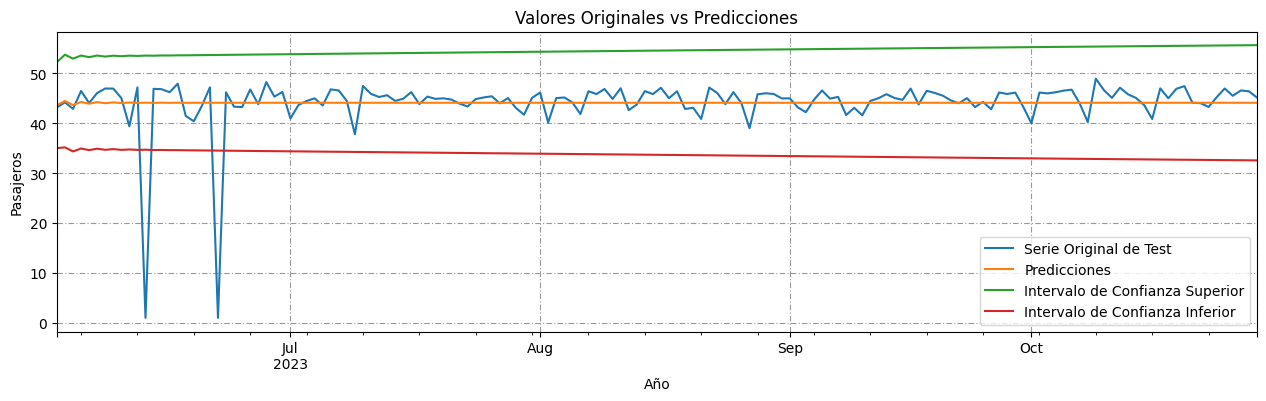

In [443]:
predicciones_arima = modelo_arima.get_forecast(150)

graficar_pred(test[:150], predicciones_arima.predicted_mean, predicciones_arima.conf_int())

In [444]:
evaluar_metricas(test[:150], predicciones_arima.predicted_mean)

MSE: 29.0827185379928
MAE: 2.2605198408977762
RMSE: 5.392839561677391
MAPE: 0.6128


In [480]:
error_relativo_arima = (test[:150] - predicciones_arima.predicted_mean) / test[:150]
# Se retiran de los errores de los valores nulos en serie original.
# Estos valores son imposibles de predecir.
#error_relativo_arima = error_relativo_arima[error_relativo_arima >-40]*100

<AxesSubplot:xlabel='Fecha'>

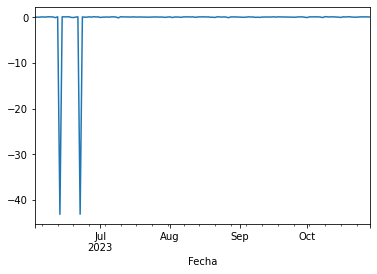

In [481]:
error_relativo_arima.plot()

In [482]:
print('La media del error relativo es =',round(np.mean(error_relativo_arima),2),'%')
print('El valor máximo del error relativo es =',round(np.max(error_relativo_arima),2),'%')
print('El valor mínimo del error relativo es =',round(np.min(error_relativo_arima),2),'%')

La media del error relativo es = -0.56 %
El valor máximo del error relativo es = 0.1 %
El valor mínimo del error relativo es = -43.14 %


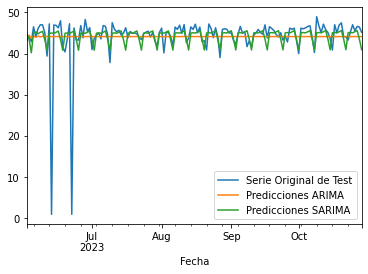

In [448]:
test[:150].plot(label="Serie Original de Test")
predicciones_arima.predicted_mean.plot(label="Predicciones ARIMA")
predicciones_sarima.predicted_mean.plot(label="Predicciones SARIMA")
plt.legend()

In [449]:
datos = {'Modelos': ['SARIMA','ARIMA'],
         'AIC': [modelo_sarima.aic, modelo_arima.aic],
         'BIC': [modelo_sarima.bic, modelo_arima.bic],
         'MAE': [modelo_sarima.mae, modelo_arima.mae],
         'MSE': [modelo_sarima.mse, modelo_arima.mse]}


modelos_residuos = pd.DataFrame(datos)
modelos_residuos

,Modelos,AIC,BIC,MAE,MSE
0,SARIMA,3554.143156,3585.01438,2.539623,23.025017
1,ARIMA,3543.340341,3578.62174,2.781464,22.666106


El modelo SARIMA presenta mejores resultados que el ARIMA.

Modelo sarima de la diferencia.

In [460]:
errores_arima = predicciones_arima.predicted_mean - test[:150]
errores_sarima = predicciones_sarima.predicted_mean - test[:150]
mean_errores_arima = np.mean(errores_arima)
mean_errores_sarima = np.mean(errores_sarima)
print("La media de los errores del modelo SARIMA =", round(mean_errores_sarima, 2))
print("La media de los errores del modelo ARIMA =", round(mean_errores_arima, 2))

La media de los errores del modelo SARIMA = 0.03
La media de los errores del modelo ARIMA = -0.12


[Text(0.5, 1.0, 'SARIMA')]

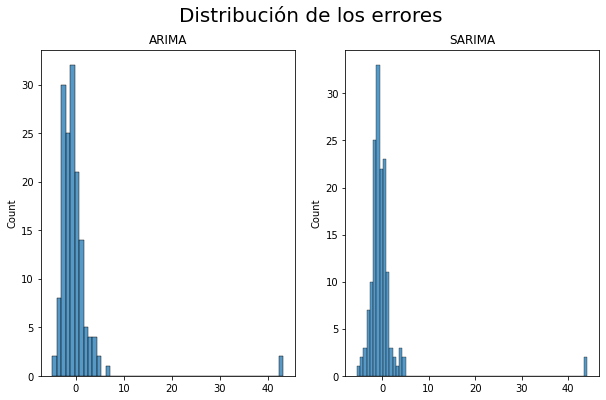

In [479]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de los errores', fontsize = 20)

sns.histplot(data = errores_arima, ax = axs[0]).set(title='ARIMA')
sns.histplot(data = errores_sarima, ax = axs[1]).set(title='SARIMA')

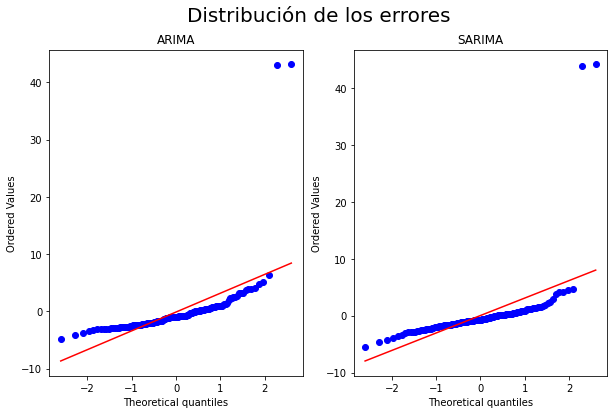

In [484]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de los errores', fontsize = 20)

scipy.stats.probplot(errores_arima, plot = axs[0]);
scipy.stats.probplot(errores_sarima, plot = axs[1]);
axs[0].set_title("ARIMA");
axs[1].set_title("SARIMA");

Método de Holt winters exponential smoothing

In [486]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [511]:
#Divido la serie de tiempo en entrenamiento y testeo
train_len = round(len(df_consumo.Consumo)*0.8)
train = df_consumo.iloc[0:train_len] # Primeros 134 meses para entrenamiento
test = df_consumo.iloc[train_len:] # Ultimos 12 meses para testeo

In [512]:
# Entreno el modelo
largo = len(df_consumo.Consumo) - train_len
fitted_model = ExponentialSmoothing(train['Consumo'],trend="mul",seasonal="mul",seasonal_periods=largo).fit()
test_predictions = fitted_model.forecast(largo)

In [513]:
prediccion=[]

for dia in range(0,largo):
  prediccion.append(test_predictions[dia])

In [514]:
print(prediccion)

[40.52420562945842, 43.10522599815091, 43.40068356501951, 43.8398255617228, 43.80192431555224, 44.28156914646169, 43.56761825292281, 44.16934176602054, 43.15070319506452, 43.65034568349761, 43.36621690740596, 42.387332587006696, 43.548121097949604, 44.673855712560915, 45.38885417544647, 44.796973762751584, 45.101514806594906, 43.36887342144641, 45.17480764771439, 43.97488764383975, 44.46435101391692, 42.75264039567909, 42.66300183856009, 41.94825547740943, 43.31881192421659, 42.142253807221536, 43.094309841842396, 45.30402912044852, 44.567593447462755, 44.17881144174069, 44.08165327772965, 44.04322024888019, 44.49742531718567, 43.171727957384505, 44.77814403975806, 44.74200474364878, 45.372025935922345, 45.24242187326897, 44.34774711728412, 45.44265353398015, 45.11598710950743, 45.08159524412618, 43.781551731619594, 42.70936509895775, 45.37474578631378, 43.26664890952782, 42.78167681921874, 41.889736765603644, 41.40635095557972, 43.199058527172895, 42.09093253518937, 40.93693564389177,

In [517]:
test['prediccion'] = np.array(prediccion)

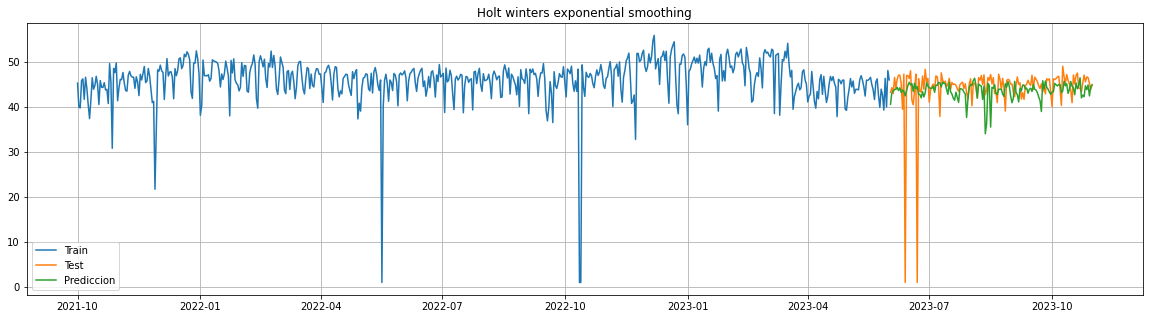

In [518]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Consumo'], label='Train')
plt.plot(test['Consumo'], label='Test')
plt.plot(test['prediccion'], label='Prediccion')
plt.legend(loc='best')
plt.title('Holt winters exponential smoothing')
plt.show()

In [519]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
model = ExponentialSmoothing(train['Consumo'],trend="mul",seasonal='mul', seasonal_periods=largo).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])
MSE=round(mean_squared_error(test['Consumo'], pred),2)
MSE

31.45

In [521]:
# Validación Cruzada de Series de Tiempo ( Sin dejar brecha )
train_sets = []
valid_sets = []

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)   #,gap=2)
for train_index, test_index in tscv.split(df_consumo.Consumo):
  print('TRAIN:', train_index, 'TEST:', test_index)
  X_train, X_test = df_consumo.Consumo[train_index], df_consumo.Consumo[test_index]

  train_sets.append(X_train)
  valid_sets.append(X_test)

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130] TEST: [131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242

In [522]:
model1 = ExponentialSmoothing(train_sets[0],trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred1 = model1.predict(start=valid_sets[0].index[0], end=valid_sets[0].index[-1])
MSE1=round(mean_squared_error(valid_sets[0], pred1),2)

model2 = ExponentialSmoothing(train_sets[1],trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred2 = model2.predict(start=valid_sets[1].index[0], end=valid_sets[1].index[-1])
MSE2=round(mean_squared_error(valid_sets[1], pred2),2)

model3 = ExponentialSmoothing(train_sets[2],trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred3 = model3.predict(start=valid_sets[2].index[0], end=valid_sets[2].index[-1])
MSE3=round(mean_squared_error(valid_sets[2], pred3),2)

model4 = ExponentialSmoothing(train_sets[3],trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred4 = model4.predict(start=valid_sets[3].index[0], end=valid_sets[3].index[-1])
MSE4=round(mean_squared_error(valid_sets[2], pred4),2)

model5 = ExponentialSmoothing(train_sets[4],trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred5 = model5.predict(start=valid_sets[4].index[0], end=valid_sets[4].index[-1])
MSE5=round(mean_squared_error(valid_sets[4], pred5),2)

In [523]:
print ("MSE:", MSE)
print ("MSE1:", MSE1)
print ("MSE2:", MSE2)
print ("MSE3:", MSE3)
print ("MSE4:", MSE4)
print ("MSE5:", MSE5)

MSE: 31.45
MSE1: 54.1
MSE2: 41.99
MSE3: 59.64
MSE4: 15.13
MSE5: 16.64


In [524]:
Overall_MSE=round((MSE1+MSE2+MSE3+MSE4+MSE5)/5,2)
print ("Promedio general MSE:", Overall_MSE)

Promedio general MSE: 37.5


In [526]:
# Validación Cruzada de Series de Tiempo ( Dejando brecha )
train_sets = []
valid_sets = []

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5 ,gap=2)
for train_index, test_index in tscv.split(df_consumo.Consumo):
  print('TRAIN:', train_index, 'TEST:', test_index)
  X_train, X_test = df_consumo.Consumo[train_index], df_consumo.Consumo[test_index]

  train_sets.append(X_train)
  valid_sets.append(X_test)

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128] TEST: [131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244

In [527]:
model1 = ExponentialSmoothing(train_sets[0],trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred1 = model1.predict(start=valid_sets[0].index[0], end=valid_sets[0].index[-1])
MSE1=round(mean_squared_error(valid_sets[0], pred1),2)

model2 = ExponentialSmoothing(train_sets[1],trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred2 = model2.predict(start=valid_sets[1].index[0], end=valid_sets[1].index[-1])
MSE2=round(mean_squared_error(valid_sets[1], pred2),2)

model3 = ExponentialSmoothing(train_sets[2],trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred3 = model3.predict(start=valid_sets[2].index[0], end=valid_sets[2].index[-1])
MSE3=round(mean_squared_error(valid_sets[2], pred3),2)

model4 = ExponentialSmoothing(train_sets[3],trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred4 = model4.predict(start=valid_sets[3].index[0], end=valid_sets[3].index[-1])
MSE4=round(mean_squared_error(valid_sets[2], pred4),2)

model5 = ExponentialSmoothing(train_sets[4],trend="mul", seasonal='mul', seasonal_periods=12).fit()
pred5 = model5.predict(start=valid_sets[4].index[0], end=valid_sets[4].index[-1])
MSE5=round(mean_squared_error(valid_sets[4], pred5),2)

In [528]:
print ("MSE:", MSE)
print ("MSE1:", MSE1)
print ("MSE2:", MSE2)
print ("MSE3:", MSE3)
print ("MSE4:", MSE4)
print ("MSE5:", MSE5)

MSE: 31.45
MSE1: 52.79
MSE2: 41.73
MSE3: 78.14
MSE4: 15.84
MSE5: 21.4


In [529]:
Overall_MSE=round((MSE1+MSE2+MSE3+MSE4+MSE5)/5,2)
print ("Promedio general MSE:", Overall_MSE)

Promedio general MSE: 41.98
